### Qubit and Bloch sphere
The state of a single qubit is described by a density matrix $\rho$, which is $2\times 2$, unit trace, and semi-positive definite matrix
$$\rho = \frac{1}{2}\left(I + \vec{\bm{r}}\cdot\vec{\bm{\sigma}}\right)$$

Mathematically, any $2\times 2$ matrix is linear combination of Pauli matrices and identity matrix
$$A_{2\times 2} = c_0 I + c_1\sigma_1 + c_2\sigma_2 + c_3\sigma_3$$

The density matrix takes the same form, with $\vec{\bm{r}} = \begin{bmatrix} r_x & r_y & r_z\end{bmatrix}^T$, and $\vec{\bm{\sigma}} = \begin{bmatrix}\sigma_x & \sigma_y & \sigma_z\end{bmatrix}^T$

In [ ]:
import numpy as np
from collections.abc import Iterable

class Qubit:
    def __init__(self, nbody:int=2, nlevel:int=2):
        self.nbody = nbody
        self.nlevel = nlevel
        self.basis = np.identity(nlevel)

    def __call__(self, *args, **kwds):
        print(f"this is {self.nbody}-body, {self.nlevel}-level system")
    
    @classmethod
    def bell_state(cls)->np.ndarray:
        return 1/np.sqrt(2.) * np.array([1,0,0,1],dtype=float)
    
    @classmethod
    def rho_bell(cls)->np.ndarray:
        bell = cls.bell_state()
        return np.outer(bell,bell)


In [ ]:
qubit = Qubit()
#print(Qubit.rho_bell())
print(Qubit.bell_state())
qubit()

[0.70710678 0.         0.         0.70710678]
this is 2-body, 2-level system


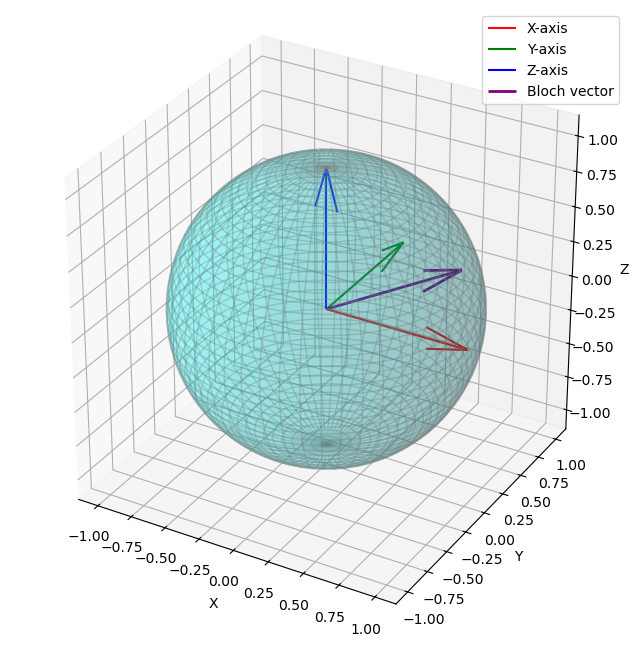

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere_general(theta, phi):
    """
    Plots a Bloch sphere and visualizes a general qubit state |ψ⟩.
    
    Parameters:
    - theta: Polar angle (0 ≤ theta ≤ π).
    - phi: Azimuthal angle (0 ≤ phi < 2π).
    """
    # Create a figure for 3D plotting
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Plot the sphere surface
    ax.plot_surface(x, y, z, color='cyan', alpha=0.2, edgecolor='gray')
    
    # Draw x, y, z axes
    ax.quiver(0, 0, 0, 1, 0, 0, color="red", label="X-axis")   # X-axis
    ax.quiver(0, 0, 0, 0, 1, 0, color="green", label="Y-axis") # Y-axis
    ax.quiver(0, 0, 0, 0, 0, 1, color="blue", label="Z-axis")  # Z-axis
    
    # Compute Bloch vector
    x_bloch = np.sin(theta) * np.cos(phi)
    y_bloch = np.sin(theta) * np.sin(phi)
    z_bloch = np.cos(theta)
    
    # Plot Bloch vector
    ax.quiver(0, 0, 0, x_bloch, y_bloch, z_bloch, color="purple", linewidth=2, label="Bloch vector")
    
    # Set labels and limits
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_zlim([-1.1, 1.1])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    # Add a legend
    ax.legend()
    
    # Set aspect ratio to equal for a proper sphere
    ax.set_box_aspect([1, 1, 1])
    
    plt.show()

# Example usage:
# |ψ⟩ = cos(π/4)|0⟩ + e^(iπ/3)sin(π/4)|1⟩
theta = np.pi / 2  # Polar angle
phi = np.pi / 3    # Azimuthal angle
plot_bloch_sphere_general(theta, phi)


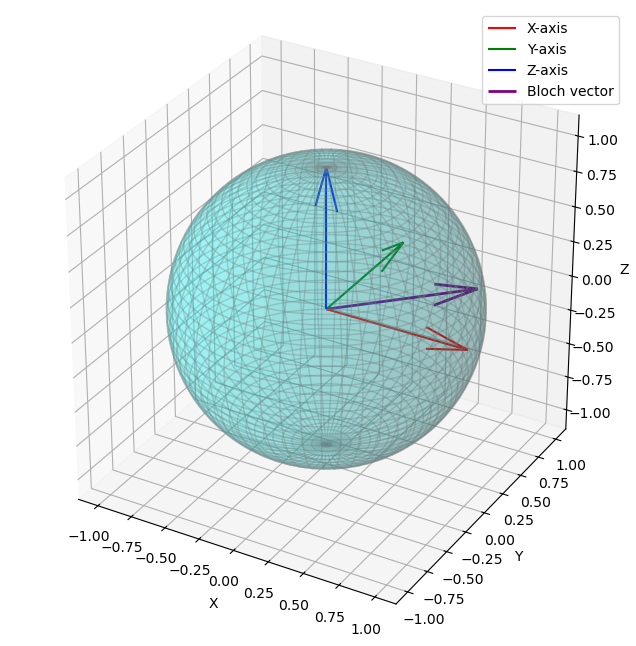

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere(bloch_vector=None):
    """
    Plots a Bloch sphere and optionally a Bloch vector.
    
    Parameters:
    - bloch_vector: A 3-element list or array representing the Bloch vector (e.g., [x, y, z]).
    """
    # Create a figure for 3D plotting
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Plot the sphere surface
    ax.plot_surface(x, y, z, color='cyan', alpha=0.2, edgecolor='gray')
    
    # Draw x, y, z axes
    ax.quiver(0, 0, 0, 1, 0, 0, color="red", label="X-axis")   # X-axis
    ax.quiver(0, 0, 0, 0, 1, 0, color="green", label="Y-axis") # Y-axis
    ax.quiver(0, 0, 0, 0, 0, 1, color="blue", label="Z-axis")  # Z-axis
    
    # Plot Bloch vector if provided
    if bloch_vector is not None:
        bx, by, bz = bloch_vector
        ax.quiver(0, 0, 0, bx, by, bz, color="purple", linewidth=2, label="Bloch vector")
    
    # Set labels and limits
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_zlim([-1.1, 1.1])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    # Add a legend
    ax.legend()
    
    # Set aspect ratio to equal for a proper sphere
    ax.set_box_aspect([1, 1, 1])
    
    plt.show()

# Example usage:
# Bloch vector [0.7, 0.7, 0.0] (example pure state)
plot_bloch_sphere(bloch_vector=[0.7, 0.7, 0.0])
